<a href="https://colab.research.google.com/github/wilberj88/Ascenso/blob/main/Estad%C3%ADsticas%20de%20Georreferenciaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/paular143/images_notebooks/master/logo-sin-nombre.png" alt="Universidad de Los Andes" style="width: 90px;" align="left" frameborder="300"/>

**UNIVERSIDAD DE LOS ANDES** <br>
**FACULTAD DE ECONOMÍA - EDUCACIÓN CONTINUADA** <br>
**Análisis espacial de datos y sus aplicaciones en Python 2020** <br>
**PROFESORES:** Germán González y Mateo Dulce <br><br>


# Clase 3: Estadísticas descriptivas de geolocalización

- Paquete _geopandas_.
- Capas y siluetas. 
- Mapas de calor.
- Estimación de Densidad de Kernel.


In [ ]:
!pip3 install geopandas

# Importamos los paquetes necesarios
import pandas as pd # Paquete para manejo de bases de datos (DataFrames)
import geopandas as gpd # Paquete para manejo de bases de datos espaciales
import matplotlib.pyplot as plt # Paquete para hacer gráficas y figuras en Python
import numpy as np # Paquete para trabajar con operaciones numéricas y vectores

from shapely.geometry import Point # Paquete para manipulación de objetos geográficos

     |████████████████████████████████| 962kB 2.8MB/s 
     |████████████████████████████████| 14.7MB 241kB/s 
     |████████████████████████████████| 10.9MB 40.3MB/s 


### El paquete _GeoPandas_ es la versión del famoso paquete _Pandas_ para trabajar con datos geográficos. 
#### Contiene funciones para manipular las geometrías de las observaciones y almacena los atributos estructurados como un DataFrame de Pandas con todos sus métodos usuales.

In [ ]:
# GeoPandas tiene precargadas algunas bases de datos, entre esas los países del mundo
paises = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(paises)
paises

       pop_est  ...                                           geometry
0       920938  ...  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1     53950935  ...  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2       603253  ...  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3     35623680  ...  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4    326625791  ...  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
..         ...  ...                                                ...
172    7111024  ...  POLYGON ((18.82982 45.90887, 18.82984 45.90888...
173     642550  ...  POLYGON ((20.07070 42.58863, 19.80161 42.50009...
174    1895250  ...  POLYGON ((20.59025 41.85541, 20.52295 42.21787...
175    1218208  ...  POLYGON ((-61.68000 10.76000, -61.10500 10.890...
176   13026129  ...  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...

[177 rows x 6 columns]


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [ ]:
# Cada fila tiene variables asociadas y su geometría respectiva (siempre esa columna se va a llamar 'geometry')
paises

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


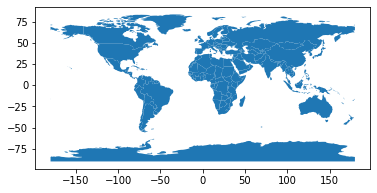

In [ ]:
# Con .plot() podemos graficar rápidamente y sobre el jupyter notebook un GeoDataFrame. Infiere y grafica la columna 'geometry'.
paises.plot();

In [ ]:
# Mapa coroplético población

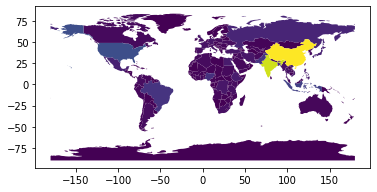

In [ ]:
# Con el argumento 'column' indicamos la variable con la que se quiere construir el mapa coroplético.
# Esto quiere decir que el color de cada geometría (polígono, punto, línea, ...) representa el valor que toma en la columna indicada.
# En este caso usamos la variable población ('pop_est')
paises.plot(column = 'pop_est');

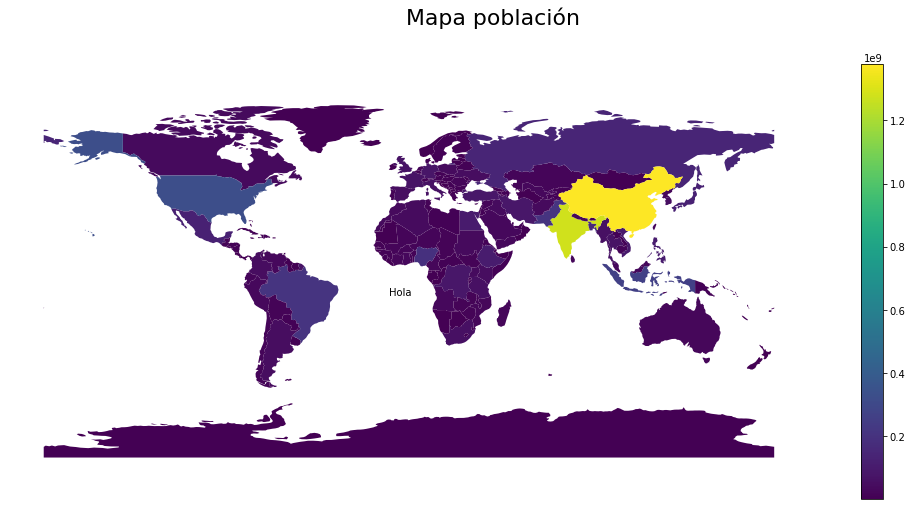

In [ ]:
# Con el paquete matplotlib (plt) podemos personalizar y editar las gráficas.
# Para esto es recomendable crear los objetos figura (fig) y ejes (ax) también indicando el tamaño de la figura que se desea construir (ancho, alto).
fig, ax = plt.subplots(figsize = (18,8)) 
# Luego usamos el .plot() de geopandas pero le indicamos dónde queremos que se pinte la figura con ax = ax. 
paises.plot(column = 'pop_est', ax = ax, legend = True) #legend = True pinta la barra de la derecha que dice el valor al que hace referencia cada color del mapa.
plt.suptitle('Mapa población', fontsize = 22) # Agregamos un titulo a toda la figura, se puede editar el tamaño, color y fuente.
ax.axis('off') # Eliminamos los ejes coordenados.  
ax.text(-10,-10, 'Hola'); # Podemos agregar un texto al mapa indicando sus coordenadas (ubicación x, y) y el texto que se desea escribir.

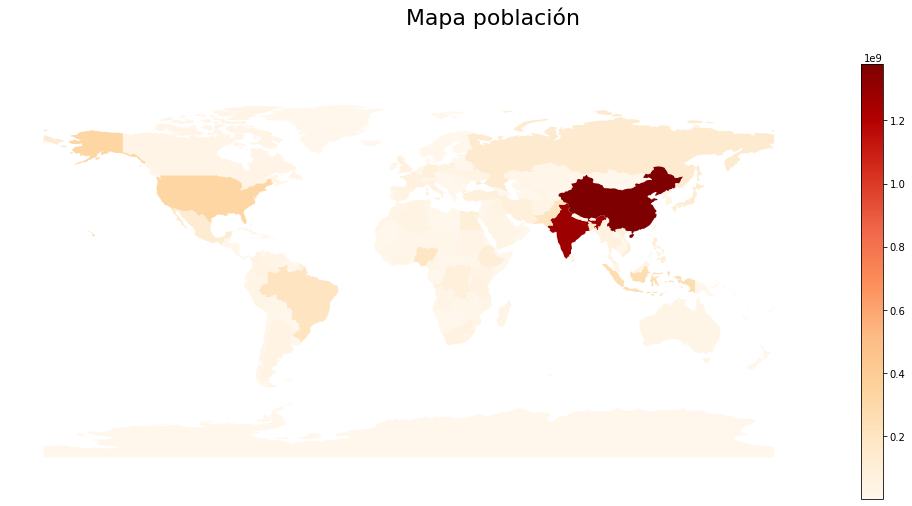

In [ ]:
# Otro ejemplo igual que antes
fig, ax = plt.subplots(figsize = (18,8))
# Con cmap se elige el mapa de colores que se utiliza en el mapa coroplético.
paises.plot(column = 'pop_est', ax = ax, legend = True, cmap = 'OrRd') # Recuerde siempre decir dónde queremos que se pinte el gráfico ax = ax.
plt.suptitle('Mapa población', fontsize = 22)
ax.axis('off');

### Aquí para explorar y elegir mapas de colores (cmaps) https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html

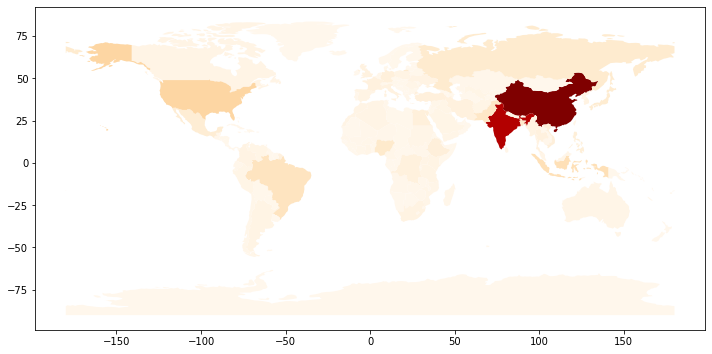

In [ ]:
# Recuerde que todo esto lo podemos hacer directamente en una línea de código y usando la función plot()
# Lo anterior es necesario para hacer modificaciones y personalizar con mayor detalle los gráficos 
paises.plot(column = 'pop_est', cmap = 'OrRd', figsize = (12,8))

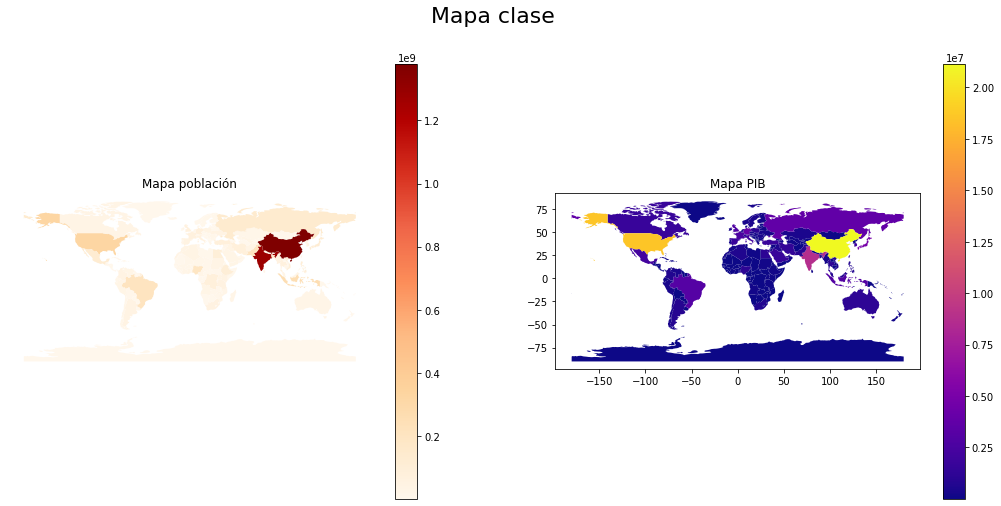

In [ ]:
# Por ejemplo para hacer múltiples gráficos en una sola figura usamos el mismo plt.subplots(filas, columnas) indicando el número de filas y columnas de gráficos que queremos construir
fig, ax = plt.subplots(1,2,figsize = (18,8))
# En este caso ax es una lista de axes, y toca decirle en cual de todos estos es que queremos cada figura
paises.plot(column = 'pop_est', ax = ax[0], legend = True, cmap = 'OrRd') # Esto lo queremos en el primer axes ax[0]
ax[0].axis('off') # Para ese ax[0] queremos eliminar los ejes 
ax[0].set_title('Mapa población') # Y ponerle un título a este subgráfico
paises.plot(column = 'gdp_md_est', ax = ax[1], legend = True, cmap = 'plasma') # Ahora este mapa lo queremos en el segundo axes ax[1]
ax[1].set_title('Mapa PIB') # Le ponemos titulo al subgrafico
plt.suptitle('Mapa clase', fontsize = 22); # Agregamos un título a toda la figura

In [ ]:
# Las ciudades del mundo también vienen pre-cargadas en geopandas
ciudades = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [ ]:
ciudades

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)
...,...,...
197,Cairo,POINT (31.24802 30.05191)
198,Tokyo,POINT (139.74946 35.68696)
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)


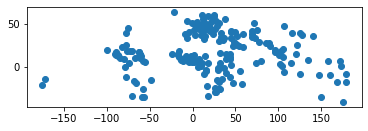

In [ ]:
# Podemos graficar directamente la información geográfica de esta base.
# Sin embargo, surge la necesidad de agregar más capas a la visualización para orientar y proveer más información
ciudades.plot();

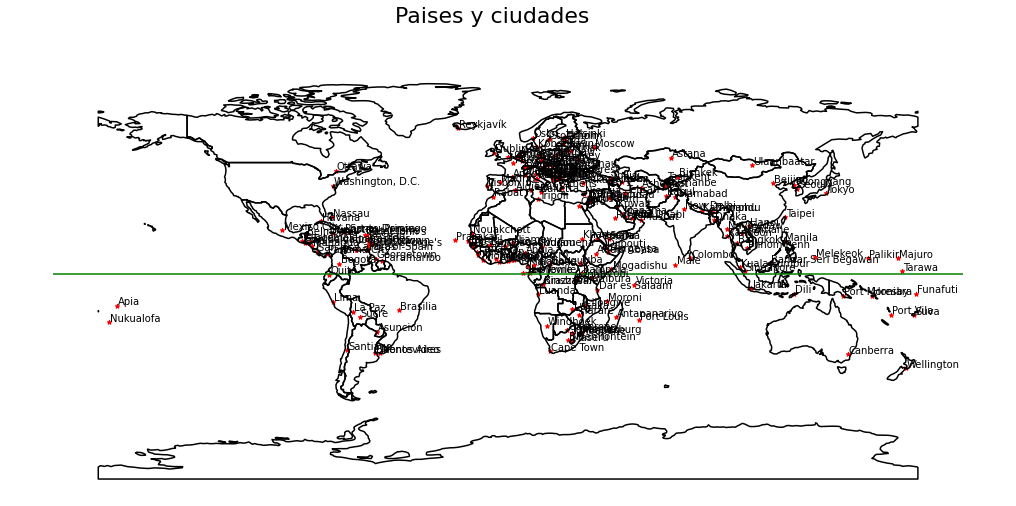

In [ ]:
# Para agregar más capas nuevamente creamos los objetos figura y axes
fig, ax = plt.subplots(figsize = (18,8))
paises.boundary.plot(ax = ax, edgecolor = 'black') # Graficamos los bordes de los paises diciendole que lo pinte en ax = ax
ciudades.plot(ax = ax, marker = '*', color = 'red', markersize = 20) # Graficamos las ciudades nuevamente en ax = ax. Especificamos el color, el tamaño y el marcador.
ax.axis('off') # Eliminamos ejes.
# Luego agregamos los nombres de las ciudades con ax.text()
for i in range(len(ciudades)): # Para cada fila de la base de datos de ciudades
    # Escribimos el texto en la posición x de la longitud de la ciudad, la posición y de su laditud, y su nombre de la columna 'name'
    ax.text(ciudades.loc[i, 'geometry'].x + 0.5, ciudades.loc[i, 'geometry'].y + 0.5, ciudades.loc[i, 'name'])
plt.suptitle('Paises y ciudades', fontsize = 22) # Título del gráfico.
ax.hlines(0, -200, 200, color = 'green'); # Línea horizontal a la altura y = 0, y desde x_min = -200 hasta x_max = 200, en verde. Para lineas verticales ax.vlines
plt.savefig('ciudades_mundo.png'); # Guardamos la figura con plt.savefig(), se puede guardar en diferentes formatos y especificar calidad de la imágen y otros parámetros.

#### Markers https://matplotlib.org/api/markers_api.html

### Datos de eventos de minas antiperonal

In [ ]:
# Leemos el archivo de la información de minas antipersonal directamente desde el .zip (dentro está el shape file)
minas = gpd.read_file('zip://Datos/eventos_minas.zip', encoding = 'utf8')

In [ ]:
# Nuevamente, todos los GeoDataFrame tienen la columna de 'geometry' con la información geográfica de cada registro y las columnas con variables estructuradas.
minas

,a_o,codigo_dan,codigo_d_2,departamen,evento,latitud_ca,longitud_c,mes,municipio,sitio,tipo_area,tipo_event,tipo_lugar,geometry
0,1996.0,13.0,13549.0,BOLIVAR,Sin informaci?n,8.916994,-74.465777,7.0,PINILLOS,Sin informaci?n,Rural,Desminado militar en operaciones,Sin informacion,POINT (-74.46578 8.91699)
1,2013.0,68.0,68689.0,SANTANDER,Sin informaci?n,6.805170,-73.528320,3.0,SAN VICENTE DE CHUCUR?,Rul # 21 Vereda El Filon,Rural,Sospecha de campo minado,Fincas,POINT (-73.52832 6.80517)
2,2013.0,5.0,5652.0,ANTIOQUIA,Sin informaci?n,5.951820,-75.082350,6.0,SAN FRANCISCO,Sin informaci?n,Rural,Sospecha de campo minado,Sin informacion,POINT (-75.08235 5.95182)
3,2015.0,50.0,50330.0,META,Sin informaci?n,2.926850,-74.159800,12.0,MESETAS,Bizcocho I,Rural,Sospecha de campo minado,Campo,POINT (-74.15980 2.92685)
4,2002.0,5.0,5890.0,ANTIOQUIA,Sin informaci?n,6.730556,-75.062500,1.0,YOLOMB?,Vereda San Rafael,Rural,Accidente por MAP,Sin informacion,POINT (-75.06250 6.73056)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36797,2019.0,54.0,54820.0,NORTE DE SANTANDER,Sin informaci?n,7.053611,-72.227500,12.0,TOLEDO,SECTOR DE PUERTO PICHO,Rural,Accidente por MAP,Sin informacion,POINT (-72.22750 7.05361)
36798,2019.0,52.0,52835.0,NARI?O,Sin informaci?n,1.425556,-78.744444,12.0,TUMACO,CASAS VIEJAS,Rural,Desminado militar en operaciones,Sin informacion,POINT (-78.74444 1.42556)
36799,2020.0,23.0,23580.0,CORDOBA,Sin informaci?n,7.591944,-75.826111,2.0,PUERTO LIBERTADOR,SANTA ROSA,Rural,Desminado militar en operaciones,Sin informacion,POINT (-75.82611 7.59194)
36800,2020.0,5.0,5120.0,ANTIOQUIA,Sin informaci?n,7.559167,-75.213611,2.0,C?CERES,ALTO DEL TIGRE-BAJO,Rural,Desminado militar en operaciones,Sin informacion,POINT (-75.21361 7.55917)


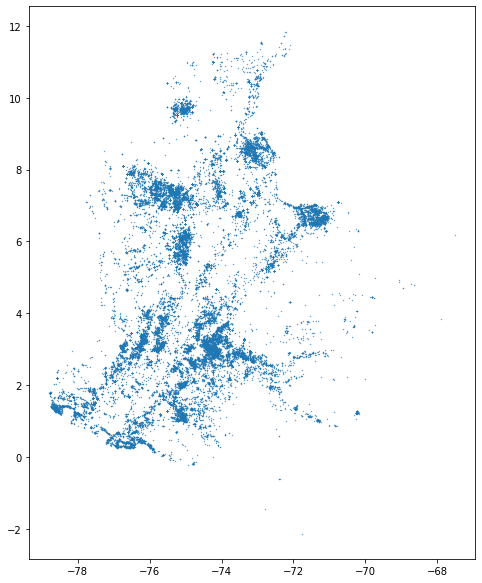

In [ ]:
# Podemos graficar directamente con .plot(). Específicamos tamaño de la figura y tamaño de cada punto.
# Nuevamente necesidad de agregar capas con información adicional
minas.plot(figsize = (8,12), markersize = 0.1);

In [ ]:
paises = paises.set_index('name')
paises

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Fiji,920938,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
Tanzania,53950935,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
W. Sahara,603253,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,35623680,North America,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
United States of America,326625791,North America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...
Serbia,7111024,Europe,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
Montenegro,642550,Europe,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
Kosovo,1895250,Europe,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."


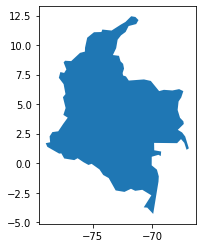

In [ ]:
# Extraemos Colombia de la base de países (precargada en gpd) y graficamos
paises.loc[['Colombia']].plot()

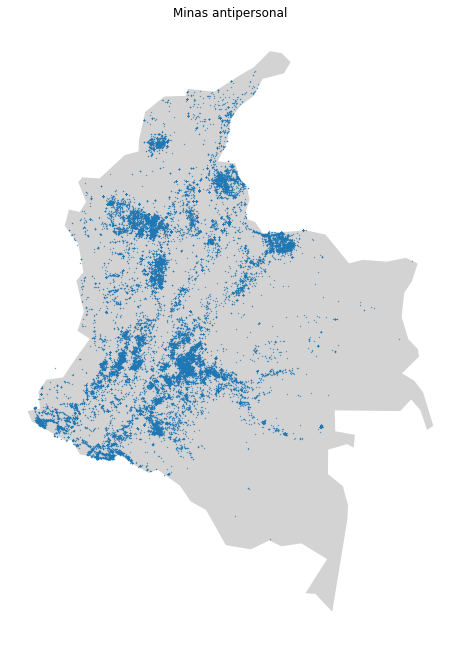

In [ ]:
# Graficamos ambas capas juntas diciendo en cada plot dónde queremos graficar, ax = ax.
fig, ax = plt.subplots(figsize = (8,12))
paises.loc[['Colombia']].plot(ax = ax, color = 'lightgrey')
minas.plot(ax = ax, markersize = 0.1)
ax.axis('off')
ax.set_title('Minas antipersonal');

In [ ]:
# Cargamos la información de los municipios del país.
mpios = gpd.read_file('../Clase 2 - Datos/Codigo/MPM/MPM_FuenteCensal_2018.shp')
mpios.to_crs(epsg=4326, inplace = True)

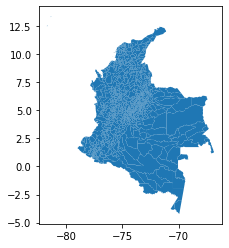

In [ ]:
# Graficamos rápidamente.
mpios.plot()

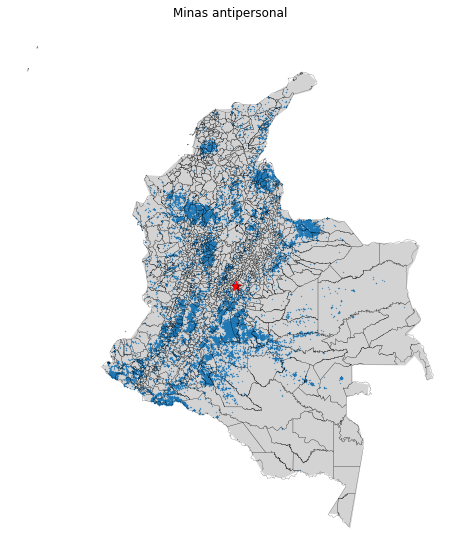

In [ ]:
# Agregamos las diferentes capas en una mísma figura con ax = ax.
fig, ax = plt.subplots(figsize = (8,12)) # Creamos la figura
paises.loc[['Colombia']].plot(ax = ax, color = 'lightgrey') # Graficamos Colombia en gris en ax=ax.
mpios.boundary.plot(ax = ax, edgecolor = 'k', linewidth = 0.2, alpha = 0.8) # Graficamos los bordes de los municipios de colombia, en negro, delgado y transparente, y en ax=ax.
minas.plot(ax = ax, markersize = 0.1) # Graficamos los eventos de minas antipersonal con tamaño 0.1, en ax=ax.
ciudades.query('name=="Bogota"').plot(ax = ax, marker = '*', color = 'red', markersize = 100) # Agregamos Bogotá (desde la base de ciudades) en rojo, con marcador estrella y tamaño 100, en ax=ax.
ax.axis('off') # Eliminamos ejes.
ax.set_title('Minas antipersonal'); #Agregamos título.

### Vivienda nueva en Bogotá 

In [ ]:
# Cargo el archivo de viviendas desde csv.
viviendas = pd.read_csv('Datos/vivienda_nueva_bta.csv')

In [ ]:
viviendas

,Direccion,Barrio,Latitud,Longitud,Tipo_vivienda,Dproymes,Localidad,Cod_proyecto,Proyecto
0,Cr. 92 # 149-30,Campiña,-74.084032,4.744768,No VIS,Abril,Suba,20275,Colinas de Suba
1,Cr. 7 # 126-30,Pinar de Santa Bárbara,-74.028022,4.701646,No VIS,Abril,Usaquén,30712,Reserva de la Sierra
2,Tv. 19A # 96-56,Chicó,-74.053723,4.684059,No VIS,Abril,Chapinero,30959,Oqyana
3,Av. Suba con 119,Córdoba,-74.067317,4.706892,No VIS,Abril,Suba,31238,Provenza Imperial
4,Cl. 94 # 21-59,Chicó,-74.056800,4.681600,No VIS,Abril,Chapinero,31422,Art 94
...,...,...,...,...,...,...,...,...,...
628,Cr. 7 # 6-15 Sur,Calvo Sur,-74.084578,4.582397,No VIS,Abril,San Cristóbal,407123,Ed. Ludwyg
629,Cl. 36 Sur # 51D-53,El Tejar,-74.128551,4.601916,No VIS,Abril,Puente Aranda,407124,Ed. Alcala
630,Tv. 35 # 27B-21 Sur,Los Sauces,-74.115590,4.595823,No VIS,Abril,Puente Aranda,407125,Ed. Ebenezzer
631,Av. Cr. 70C # 57R-75 Sur,Perdomo,-74.162266,4.593081,VIS,Abril,Ciudad Bolívar,407128,Estancia 70


In [ ]:
# Hay un error y las columnas latitud y longitud están mal nombradas, con .rename podemos solucionar esto.
viviendas.rename(columns = {'Latitud':'lon', 'Longitud':'lat'}, inplace = True)

In [ ]:
viviendas

,Direccion,Barrio,lon,lat,Tipo_vivienda,Dproymes,Localidad,Cod_proyecto,Proyecto
0,Cr. 92 # 149-30,Campiña,-74.084032,4.744768,No VIS,Abril,Suba,20275,Colinas de Suba
1,Cr. 7 # 126-30,Pinar de Santa Bárbara,-74.028022,4.701646,No VIS,Abril,Usaquén,30712,Reserva de la Sierra
2,Tv. 19A # 96-56,Chicó,-74.053723,4.684059,No VIS,Abril,Chapinero,30959,Oqyana
3,Av. Suba con 119,Córdoba,-74.067317,4.706892,No VIS,Abril,Suba,31238,Provenza Imperial
4,Cl. 94 # 21-59,Chicó,-74.056800,4.681600,No VIS,Abril,Chapinero,31422,Art 94
...,...,...,...,...,...,...,...,...,...
628,Cr. 7 # 6-15 Sur,Calvo Sur,-74.084578,4.582397,No VIS,Abril,San Cristóbal,407123,Ed. Ludwyg
629,Cl. 36 Sur # 51D-53,El Tejar,-74.128551,4.601916,No VIS,Abril,Puente Aranda,407124,Ed. Alcala
630,Tv. 35 # 27B-21 Sur,Los Sauces,-74.115590,4.595823,No VIS,Abril,Puente Aranda,407125,Ed. Ebenezzer
631,Av. Cr. 70C # 57R-75 Sur,Perdomo,-74.162266,4.593081,VIS,Abril,Ciudad Bolívar,407128,Estancia 70


In [ ]:
# Con .apply aplicamos una función a cada fila (con axis = 1, columnas con axis = 0). 
# En este caso transformamos cada fila y su información de longitud y latitud en una geometría de tipo punto con shapely.geometry.Point.
viviendas['geometry'] = viviendas[['lon', 'lat']].apply(Point, axis = 1)

In [ ]:
# Transformamos el DataFrame en un GeoDataFrame. Python infiere la geometría a partir de la columna geometry.
viviendas = gpd.GeoDataFrame(viviendas)
viviendas.crs = {'init': 'epsg:4326'}

In [ ]:
# Cargue el shape file de Bogotá

In [ ]:
shp_bog = gpd.read_file('Datos/Localidades/Loca.shp')

In [ ]:
shp_bog.crs = {'init': 'epsg:4326'}

In [ ]:
# Eliminamos sumapaz para visualizar mejor
shp_bog = shp_bog[shp_bog['LocNombre'] != 'SUMAPAZ']

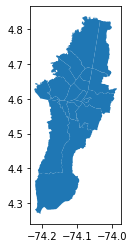

In [ ]:
# Graficamos rápidamente
shp_bog.plot()

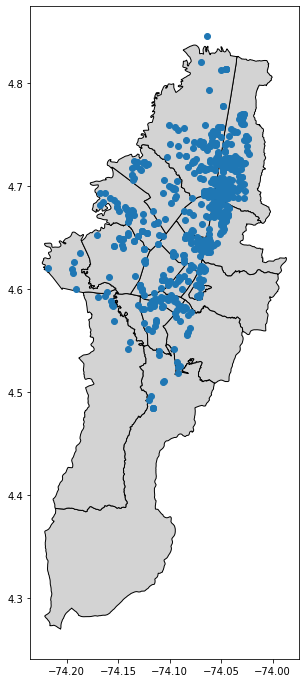

In [ ]:
# Graficamos en la misma figura las localidades de Bogotá y los proyectos de nuevas viviendas, indicando en cada caso ax = ax.
fig, ax = plt.subplots(figsize = (8,12))
shp_bog.plot(ax = ax, color = 'lightgrey', edgecolor = 'k')
viviendas.plot(ax = ax);

In [ ]:
import shapely.ops as ops

In [ ]:
# Con ops.cascaded_union hacemos la unión de varias geometrías en una sola
bogota = ops.cascaded_union(shp_bog['geometry'])

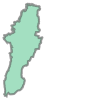

In [ ]:
# En este caso unimos los diferentes polígonos de la localidades para crear el polígono de Bogotá.
bogota

In [ ]:
viviendas

,Direccion,Barrio,lon,lat,Tipo_vivienda,Dproymes,Localidad,Cod_proyecto,Proyecto,geometry
0,Cr. 92 # 149-30,Campiña,-74.084032,4.744768,No VIS,Abril,Suba,20275,Colinas de Suba,POINT (-74.08403 4.74477)
1,Cr. 7 # 126-30,Pinar de Santa Bárbara,-74.028022,4.701646,No VIS,Abril,Usaquén,30712,Reserva de la Sierra,POINT (-74.02802 4.70165)
2,Tv. 19A # 96-56,Chicó,-74.053723,4.684059,No VIS,Abril,Chapinero,30959,Oqyana,POINT (-74.05372 4.68406)
3,Av. Suba con 119,Córdoba,-74.067317,4.706892,No VIS,Abril,Suba,31238,Provenza Imperial,POINT (-74.06732 4.70689)
4,Cl. 94 # 21-59,Chicó,-74.056800,4.681600,No VIS,Abril,Chapinero,31422,Art 94,POINT (-74.05680 4.68160)
...,...,...,...,...,...,...,...,...,...,...
628,Cr. 7 # 6-15 Sur,Calvo Sur,-74.084578,4.582397,No VIS,Abril,San Cristóbal,407123,Ed. Ludwyg,POINT (-74.08458 4.58240)
629,Cl. 36 Sur # 51D-53,El Tejar,-74.128551,4.601916,No VIS,Abril,Puente Aranda,407124,Ed. Alcala,POINT (-74.12855 4.60192)
630,Tv. 35 # 27B-21 Sur,Los Sauces,-74.115590,4.595823,No VIS,Abril,Puente Aranda,407125,Ed. Ebenezzer,POINT (-74.11559 4.59582)
631,Av. Cr. 70C # 57R-75 Sur,Perdomo,-74.162266,4.593081,VIS,Abril,Ciudad Bolívar,407128,Estancia 70,POINT (-74.16227 4.59308)


In [ ]:
# viviendas.intersects(bogota) dice si cada registro de la base de datos de viviendas intersecta (alternativamente, está contenida o contiene) al polígono dado.
# Es decir, si los proyectos son en Bogotá, o no.
# con viviendas[viviendas.intersects(bogota)] nos quedamos unicamente con los registros para los cuales viviendas.intersects(bogota) fue True o sea que están en Bogota.
viviendas = viviendas[viviendas.intersects(bogota)]

In [ ]:
from matplotlib import colors

In [ ]:
# Definimos a mano los colores de nuestro gráfico
hcmap = colors.ListedColormap(['green', 'red','blue'])

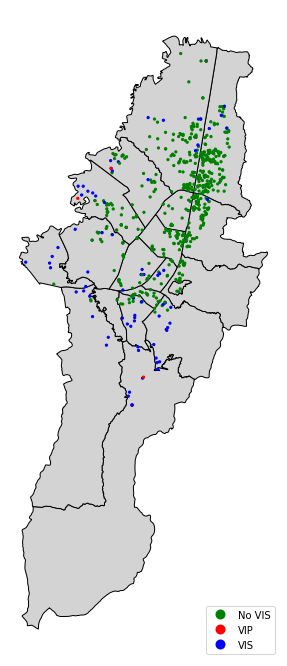

In [ ]:
fig, ax = plt.subplots(figsize = (8,12)) # Creamos la figura y axes.
shp_bog.plot(ax = ax, color = 'lightgrey', edgecolor = 'k') # Graficamos las localidaes de Bogotá en ax = ax, con fondo gris y borde negro.
viviendas.plot(ax = ax, column = 'Tipo_vivienda', cmap = hcmap, markersize = 5, categorical = True, # Graficamos los proyectos inmobiliarios en la ciudad. Colores según la variable categórica 'tipo_vivienda' con los colores definidos antes.
              legend = True, legend_kwds = {'loc': 'lower right'}) # Pedimos que la figura tenga leyenda con legend = True, y la ubicamos abajo a la derecha.
ax.axis('off'); # Eliminamos ejes

In [ ]:
# Con el signo de interrogación podemos ver la documentación de una función
?gpd.sjoin

Signature:
gpd.sjoin(
    left_df,
    right_df,
    how='inner',
    op='intersects',
    lsuffix='left',
    rsuffix='right',
)
Docstring:
Spatial join of two GeoDataFrames.

Parameters
----------
left_df, right_df : GeoDataFrames
how : string, default 'inner'
    The type of join:

    * 'left': use keys from left_df; retain only left_df geometry column
    * 'right': use keys from right_df; retain only right_df geometry column
    * 'inner': use intersection of keys from both dfs; retain only
      left_df geometry column
op : string, default 'intersection'
    Binary predicate, one of {'intersects', 'contains', 'within'}.
    See http://shapely.readthedocs.io/en/latest/manual.html#binary-predicates.
lsuffix : string, default 'left'
    Suffix to apply to overlapping column names (left GeoDataFrame).
rsuffix : string, default 'right'
    Suffix to apply to overlapping column names (right GeoDataFrame).
File:      c:\programdata\anaconda3\lib\site-packages\geopandas\tools\sjoin.py
T

In [ ]:
# gpd.sjoin hace el pegue espacial de dos bases de datos, por defecto con la operación intersects.
# En este caso, para cada proyecto de viviendas, vemos con qué localidad se intersecta y le agregamos la información de tal localidad al proyecto inmobiliario.
# Por defecto se conserva la geometría de la primera base de datos, en este caso de las localidades.
viviendas_loc = gpd.sjoin(shp_bog, viviendas)

In [ ]:
viviendas_loc

,LocNombre,LocAAdmini,LocArea,LocCodigo,SHAPE_Leng,SHAPE_Area,geometry,index_right,Direccion,Barrio,lon,lat,Tipo_vivienda,Dproymes,Localidad,Cod_proyecto,Proyecto
0,ANTONIO NARIÃO,Acuerdo 117 de 2003,4.879543e+06,15,0.108973,0.000397,"POLYGON ((-74.13075 4.59335, -74.12917 4.59327...",598,Cr. 10 # 19-33 Sur,Ciudad Jardin,-74.094498,4.576440,No VIS,Abril,Antonio Nariño,407061,Edificio Toledo
0,ANTONIO NARIÃO,Acuerdo 117 de 2003,4.879543e+06,15,0.108973,0.000397,"POLYGON ((-74.13075 4.59335, -74.12917 4.59327...",422,Cr. 10 # 15-64 Sur,Ciudad Jardin Sur,-74.092500,4.579700,No VIS,Abril,Antonio Nariño,51007,Edificio Jardines 15-64
0,ANTONIO NARIÃO,Acuerdo 117 de 2003,4.879543e+06,15,0.108973,0.000397,"POLYGON ((-74.13075 4.59335, -74.12917 4.59327...",431,Cl. 11 Sur # 10A-08,Ciudad Berna,-74.091083,4.582989,No VIS,Abril,Antonio Nariño,51032,Capital Berna IV
0,ANTONIO NARIÃO,Acuerdo 117 de 2003,4.879543e+06,15,0.108973,0.000397,"POLYGON ((-74.13075 4.59335, -74.12917 4.59327...",427,Cr. 10 # 8-55 Sur,Ciudad Berna,-74.089300,4.583500,No VIS,Abril,Antonio Nariño,51020,Ten Life
0,ANTONIO NARIÃO,Acuerdo 117 de 2003,4.879543e+06,15,0.108973,0.000397,"POLYGON ((-74.13075 4.59335, -74.12917 4.59327...",430,Cr. 13 # 9-12 Sur,Ciudad Berna,-74.092730,4.586325,No VIS,Abril,Antonio Nariño,51031,Capital Berna III
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,SUBA,Acuerdo 8 de 1977,1.005605e+08,11,0.592875,0.008191,"POLYGON ((-74.03450 4.82547, -74.03478 4.82418...",0,Cr. 92 # 149-30,Campiña,-74.084032,4.744768,No VIS,Abril,Suba,20275,Colinas de Suba
19,SUBA,Acuerdo 8 de 1977,1.005605e+08,11,0.592875,0.008191,"POLYGON ((-74.03450 4.82547, -74.03478 4.82418...",60,Cl. 153 # 103B-76,Suba Salitre,-74.091708,4.754518,No VIS,Abril,Suba,31854,Pinar Plaza
19,SUBA,Acuerdo 8 de 1977,1.005605e+08,11,0.592875,0.008191,"POLYGON ((-74.03450 4.82547, -74.03478 4.82418...",555,Cr. 99 # 156D-03,El Salitre,-74.086070,4.756310,VIS,Abril,Suba,90291,Zuri
19,SUBA,Acuerdo 8 de 1977,1.005605e+08,11,0.592875,0.008191,"POLYGON ((-74.03450 4.82547, -74.03478 4.82418...",11,Cl. 153 # 109B-18,Las Mercedes,-74.094600,4.757500,No VIS,Abril,Suba,31591,Bosque de Tulipanes


In [ ]:
# Contamos el número de proyectos en cada localidad
viviendas_loc = viviendas_loc.groupby('LocCodigo').size().reset_index(name = 'proyectos')

In [ ]:
viviendas_loc

,LocCodigo,proyectos
0,01,158
1,02,76
2,03,22
3,04,18
4,05,10
5,07,7
6,08,25
7,09,41
8,10,33
9,11,108


In [ ]:
# Pegamos a cada localidad el número de proyectos inmobiliarios encontrados. 
# Con how = 'left' conservamos todas las localidades para evitar no tener en cuenta aquellas que no tienen proyectos inmobiliarios.
viviendas_loc = shp_bog.merge(viviendas_loc, on = 'LocCodigo', how = 'left')

In [ ]:
# Para las que no tienen proyectos inmobiliarios, ponemos 0 en esta variable
viviendas_loc.fillna({'proyectos': 0}, inplace = True)

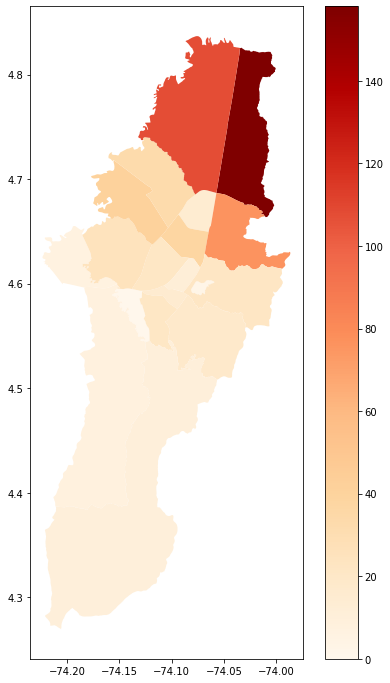

In [ ]:
# Con esto finalmente creamos el mapa coroplético de las localidades de la ciudad de acuerdo con el número de proyectos inmobiliarios en cada una y con colores 'OrRd'
viviendas_loc.plot(column = 'proyectos', cmap = 'OrRd', figsize = (8,12), legend = True);